# Polynomial Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
np.random.seed(42)
n_samples = 1000
experience = np.random.uniform(0, 20, n_samples)
age = np.random.uniform(22, 60, n_samples)
education = np.random.randint(1, 4, n_samples)  # 1: High School, 2: Bachelor's, 3: Master's+

salary = (5000 + (experience ** 1.5) * 1000 + (age * 200) + (education * 5000) + np.random.normal(0, 5000, n_samples))
data = pd.DataFrame({'Experience': experience, 'Age': age, 'Education': education, 'Salary': salary})


In [22]:
X = data[['Experience', 'Age', 'Education']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_test)
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
lin_r2 = r2_score(y_test, y_pred_linear)

In [24]:
best_degree = 1
best_rmse = float('inf')
rmse_list = []

degrees = range(1, 6)  # Test degrees from 1 to 5
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)
    y_pred_poly = poly_reg.predict(X_poly_test)

    poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    rmse_list.append(poly_rmse)

    if poly_rmse < best_rmse:
        best_rmse = poly_rmse
        best_degree = d


In [25]:
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

poly_r2 = r2_score(y_test, y_pred_poly)

In [26]:
print(f"Linear Regression RMSE: {lin_rmse:.2f}, R²: {lin_r2:.4f}")
print(f"Best Polynomial Degree: {best_degree}")
print(f"Polynomial Regression RMSE: {best_rmse:.2f}, R²: {poly_r2:.4f}")

Linear Regression RMSE: 6179.43, R²: 0.9481
Best Polynomial Degree: 3
Polynomial Regression RMSE: 4531.62, R²: 0.9721


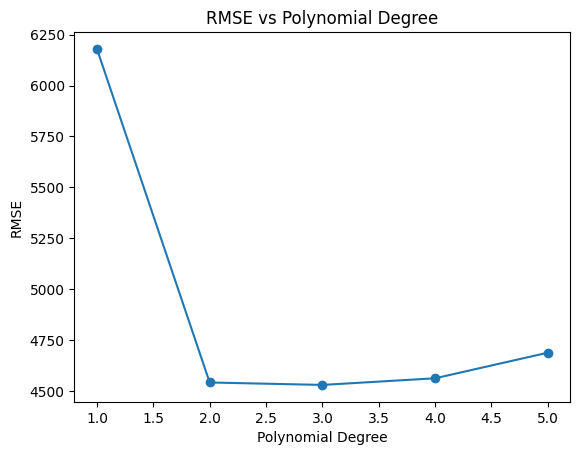

In [27]:
plt.plot(degrees, rmse_list, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.show()